## Assignment 1: Exploring and Visualizing Data
NOTE : PLEASE DO NOT POST THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING


This assignment focuses on the EDA process where you load, explore, visualize data and present your findings. 

Problem Statement : Choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials/Data : 
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  
reference:  https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 

Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.

Questions & Assumptions to Senior Managemment
- What are the management and analytical questions associated with this problem?
- What are some of the assumptions if any ?
- What are your findings/recommendations (if any) based on your analysis of the dataset?


Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.

Python Programming
All programming will be done in Python.

-- Grading Guidelines (100 points)
1) Data preparation (20 points)
2) Data exploration (20 points)
3) Data visualization (20 points)
4) Data scaling and comparisons (20 points)
5) Insights from analysis (20 points)

Deliverables and File Formats
Please use this notebook to update comments. Upload your notebook/knitted HTML file in canvas for grading.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors (intentionally, including the data dictionary) make sure to updated all the cells based on best practices along with your analysis/findings

## Update the provided data dictionary to ensure information is correct. This includes updated column names/capitilization, number of rows, number of columns, column descriptions, and data types to ensure they are accurate.

##### Data Dictionary COVID-19 

The dataset data frame has 61900 rows and 12 columns.<br>
This data frame contains the following columns:<br>
<b>dateRep</b><br>
Date Reported, dtype object<br>
<b>day</b><br>
Calendar day, dtype int64<br>
<b>month</b><br>
Calendar month, dtype int64<br>
<b>year</b><br>
Calendar year, dtype int64<br>
<b>cases</b><br>
Number of Cases Per Day, dtype int64<br>
<b>deaths</b><br>
Number of Deaths Per Day, dtype int64<br>
<b>countriesAndTerritories </b><br>
Name of associated country/territory, dtype object<br>
<b>geoId</b><br>
Geographic ID of associated country/territory, dtype object<br>
<b>countryterritoryCode</b><br>
Code of associated country/territory, dtype object<br>
<b>popData2019</b><br>
2019 Population of associated country/territory, dtype Float64<br>
<b>continentExp</b><br>
Continent continuous expanses of land (Asia, Europe, Africa, America, Oceania, Other), dtype object<br>
<b>Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 </b><br>
Cumulative Number For 14 Days of COVID-19 Cases per 100000, dtype Float64<br>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

### Commenting this out, as I have upgraded pip already

In [2]:
# Commenting this out, as I have upgraded pip already
#pip install --upgrade pip

### I have already installed prettytable, so I will comment this out as well. DETERMINE HOW TO INSTALL GEOPANDAS AFTER ASSIGNMENT 

In [3]:
# !pip install prettytable
# !pip install fbprophet

In [4]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import seaborn as sns
import sklearn
import math
from datetime import datetime


import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
#from fbprophet import Prophet
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [5]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

### Because I am choosing to load the data directly from the web, I will comment out the Colab/Google Drive commands to avoid running unnecessary code snippets

##### Load Data (for Colab/Google Drive)
##### S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [6]:
# #S2 Mount Google Drive to Colab Enviorment
# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
# #S3 Establish working directory
# import os # Operation System
# os.getcwd()
# %cd /content/gdrive/My Drive/Assignments/1/
# !pwd
# !ls
# print('Working Directory')
# print(os.getcwd())

In [8]:
# ##### Load Data 
# work_dir = " /content/gdrive/My Drive/1/"
# covid19_df=pd.read_csv('./data.csv')

## Load Dataset 

In [9]:
# Another way to pull dataset directly from the web
covid19_df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [10]:
# Check few columns to make sure the data is loaded properly
covid19_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


### Check the number of records in the dataset and data type for each column using dtypes

In [11]:
print("Dataset Shape")
print(covid19_df.shape, "\n")
print("Column Data Types")
print(covid19_df.dtypes)

Dataset Shape
(61900, 12) 

Column Data Types
dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object


#### Common functions/libraries

In [12]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

In [13]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

### I have run all of the following code above, so I am commenting this out 

#### Exploratory Data Analysis (EDA) 


In [14]:
# # Get an understanding of the data
# print("Shape:", covid19_df.shape,"\n")
# print("Variable Types:") 
# print(covid19_df.dtypes)

# covid19_df.head(15)

### Again, this is duplicating information we have already reviewed, so I will comment it out

In [15]:
# ### examine the structure of the DataFrame object###
# print('\nContents of covid19 data ---------------')

# # could use len() or first index of shape() to get number of rows/observations
# print('\nNumber of Cases =', len(covid19_df), '\n') 

# # show the column/variable names of the DataFrame
# # note that RespondentID is no longer present
# covid19_df.columns

# # abbreviated printing of the first five rows of the data frame
# print(pd.DataFrame.head(covid19_df))

### Instead of just looking at the number of unique countries, let's look at the number of unique values in all columns.

In [16]:
# Number of countries (Comment this out)
#len(covid19_df.countriesAndTerritories.unique())

# Check for unique values in all columns 
covid19_df.nunique()

dateRep                                                         350
day                                                              31
month                                                            12
year                                                              2
cases                                                          5966
deaths                                                         1049
countriesAndTerritories                                         214
geoId                                                           213
countryterritoryCode                                            212
popData2019                                                     212
continentExp                                                      6
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    39047
dtype: int64

### While the table below shows us a tabular representation of the distribution for our numeric columns, I would recommend plotting the histograms for each column to get a visual representation of the distributions as well

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row will indicate if column has missing records
</div> 

In [17]:
# summary statistics
covid19_df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


### Plotting data distribution for numeric columns. We can see here that we are dealing with outliers when looking at cases, deaths, population data, and cumulative number. Acknowledging and managing outliers will be important for prediction purposes. 

### We can also see negative death rates and case, which we will need to explore further, as this does not make sense logically. I am making the assumption that you can not have negative case counts or negative death counts 

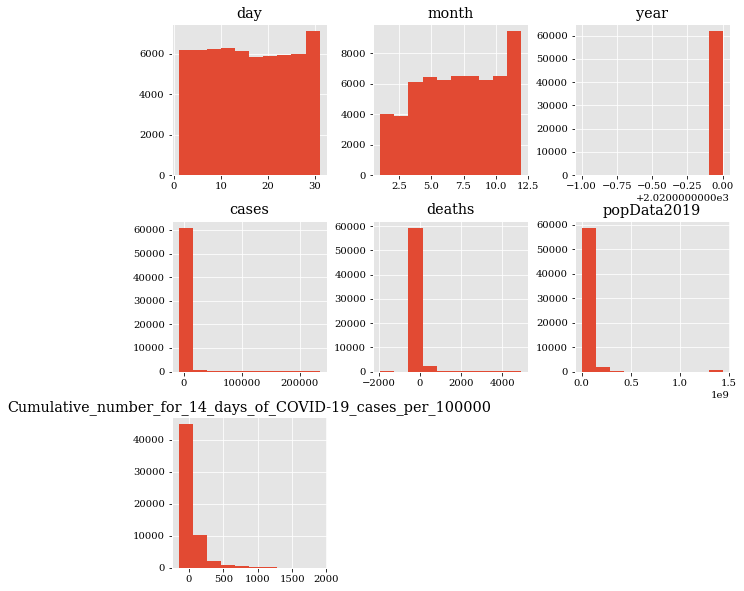

In [18]:
p = covid19_df.hist(figsize = (10,10))

### Let's check the distribution of continents as well 

<AxesSubplot:xlabel='continentExp', ylabel='count'>

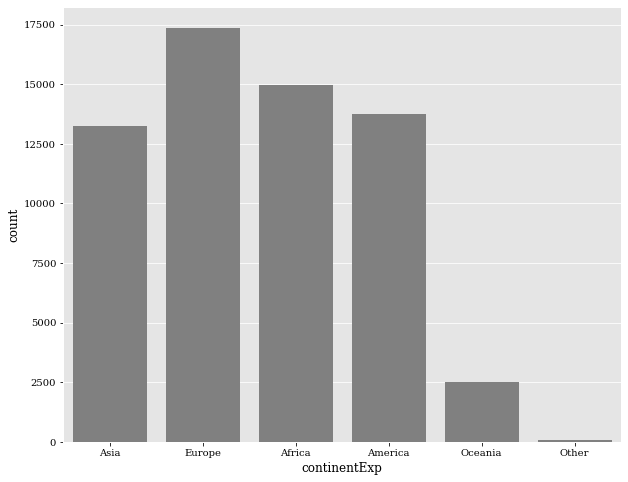

In [19]:
sns.countplot(covid19_df['continentExp'], color='gray')

### Let's conduct some more analysis on the instances where we have negative case and death rates. We see that there are only 18 records with negative case counts and 8 records with negative death counts. We will want to adjust these in the dataset during preprocessing 

In [20]:
negPop = covid19_df[covid19_df.deaths<0]
negCase = covid19_df[covid19_df.cases<0]
print("Cases with negative Case Counts:", len(negCase), "\n")
print("Cases with negative Death Counts:", len(negPop))

Cases with negative Case Counts: 18 

Cases with negative Death Counts: 8


### Review Dataset for Missing Values. For columns with missing records, we will need to determine what the best course of action is if we are going to attempt some form of prediction. This includes imputation, removal, or a combination.

<div class="alert alert-block alert-warning">
Review dataset for missing records
</div>

In [21]:
covid19_df.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

## Preprocess Data for Analysis

### I agree that it will assist in analysis to convert the date column to datetime for analysis purposes

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [22]:
# Save original dataset before transformations for later retrieval
covid19_df['dateRep']=pd.to_datetime(covid19_df['dateRep'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_df['dateRep']=pd.to_datetime(covid19_df['dateRep'], format='%Y/%m/%d')
covid19_df['dateRep'].head()

0   2020-12-14
1   2020-12-13
2   2020-12-12
3   2020-12-11
4   2020-12-10
Name: dateRep, dtype: datetime64[ns]

#### Review Data Types (dtypes)

In [23]:
covid19_df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

### Let's handle the records with negative case counts and death counts by converting them to 0, as my assumption is that you can not have a negative number of deaths 

In [24]:
# Convert negative values to 0
covid19_df.cases = np.where(covid19_df.cases < 0, 0, covid19_df.cases)
covid19_df.deaths = np.where(covid19_df.deaths < 0, 0, covid19_df.deaths)

# Confirm there are no more negative values
print("Cases with negative case count:", len(covid19_df[covid19_df.cases<0]), "\n")
print("Cases with negative death count:", len(covid19_df[covid19_df.deaths<0]))

Cases with negative case count: 0 

Cases with negative death count: 0


### For columns with null values, let's operate on a case-by-case basis 

### Starting with geoId records with null values, we can see that all null values come from Namibia. This is most likely because the geoId for Namibia is NA, causing python to assume it means null. 

### To alleviate this issue, let's imputate a new geoId for Namibia 

In [25]:
nullGeo = covid19_df[covid19_df['geoId'].isna()]
print(nullGeo['countriesAndTerritories'].value_counts(), "\n")
print(nullGeo.head())

Namibia    275
Name: countriesAndTerritories, dtype: int64 

         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
39566 2020-12-14   14     12  2020    267       0                 Namibia   
39567 2020-12-13   13     12  2020    172       0                 Namibia   
39568 2020-12-12   12     12  2020    324       2                 Namibia   
39569 2020-12-11   11     12  2020    301       3                 Namibia   
39570 2020-12-10   10     12  2020    174       2                 Namibia   

      geoId countryterritoryCode  popData2019 continentExp  \
39566   NaN                  NAM    2494524.0       Africa   
39567   NaN                  NAM    2494524.0       Africa   
39568   NaN                  NAM    2494524.0       Africa   
39569   NaN                  NAM    2494524.0       Africa   
39570   NaN                  NAM    2494524.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
39566                              

In [26]:
covid19_df['geoId'].fillna('NA', inplace=True)

### Next, let's review countryterritoryCode to determine why null values are occuring 

In [27]:
nullCTC = covid19_df[covid19_df['countryterritoryCode'].isna()]
nullCTC.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
10935,2020-03-10,10,3,2020,0,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
10936,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
10937,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
10938,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
10939,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN


In [28]:
nullCTC['countriesAndTerritories'].value_counts()

Cases_on_an_international_conveyance_Japan    64
Wallis_and_Futuna                             59
Name: countriesAndTerritories, dtype: int64

### We can see that the null values in these rows are made up of two locations: Cases_on_an_international_conveyance_Japan and Wallis_and_Futuna. 

### Because this is such a small subset of the data, and because we also do not have popData2019 records and Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 records, we will remove these records.

### This will also address the null values in popData2019

In [29]:
covid19_df = covid19_df.dropna(subset=['countryterritoryCode'])

### For null values in the Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, because it is a relatatively small number of records and there is not an easy way to extract the exact value, we will imput using the mean value from the column

In [30]:
covid19_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna(covid19_df['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].mean(), inplace = True)

### Let's now check the dataset again to ensure null values have been addressed 

In [31]:
covid19_df.isnull().sum()

dateRep                                                       0
day                                                           0
month                                                         0
year                                                          0
cases                                                         0
deaths                                                        0
countriesAndTerritories                                       0
geoId                                                         0
countryterritoryCode                                          0
popData2019                                                   0
continentExp                                                  0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
dtype: int64

In [32]:
covid19_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [33]:
covid19_df.shape

(61777, 12)

In [34]:
covid19_df.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object

## Visualizing Data

### We can see that the number of cases generally rises as time transpires, with spikes in April, July, September, and November/December

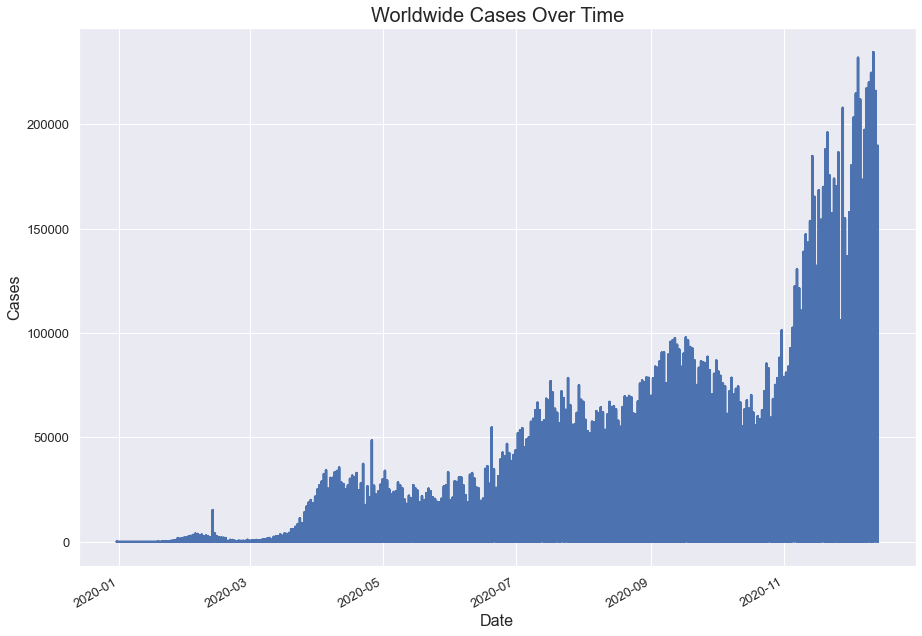

In [35]:
# How are the worldwise cases trending over time ?
world_daily = covid19_df.set_index('dateRep')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### A primary takeaway from deaths over time is that we see massive spikes over short periods of time throughout the full time series. 

### From a larger population perspective, we see general spikes in April, September, and November/December. The growth in death rates generally seems to align with growth in overall case rates that we see in the graphic above

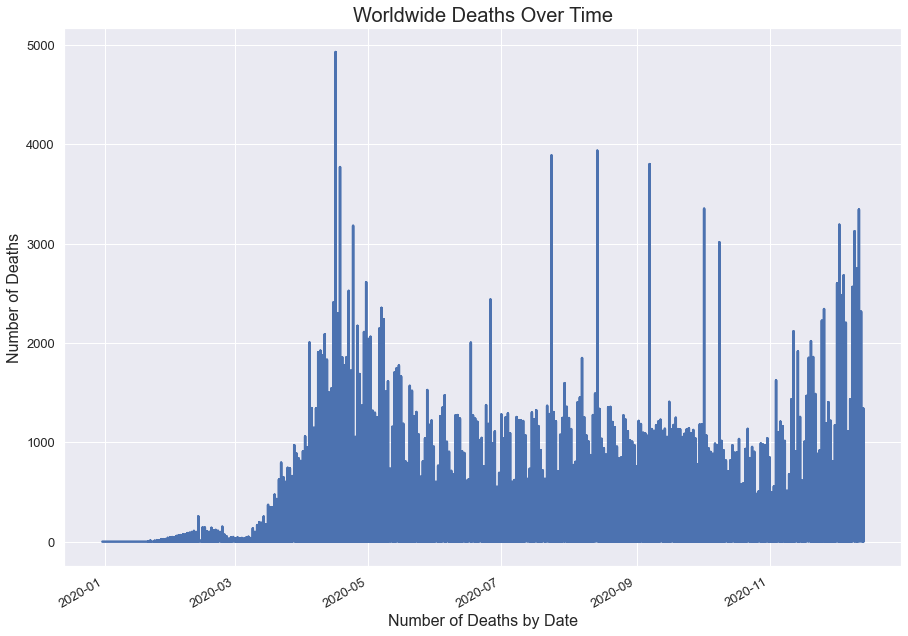

In [36]:
# How are the worldwide Deaths trending over time ?
sns.set(rc={'figure.figsize':(15,11)})
world_daily['deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### The US case rate over time tends to mirror the case rates for the entire population. To provide a couple comparison points, I included China and the UK. As we can see, the count of US cases far exceeds both China and the UK. This may be for different reasons.

### Because this looks at a count, and not rates, it makes sense that the UK (which has a much smaller population than the US) would have lower rates. However China, which has a much larger population than the US, shows no cases after mid-February. This may be due to how China reported their cases

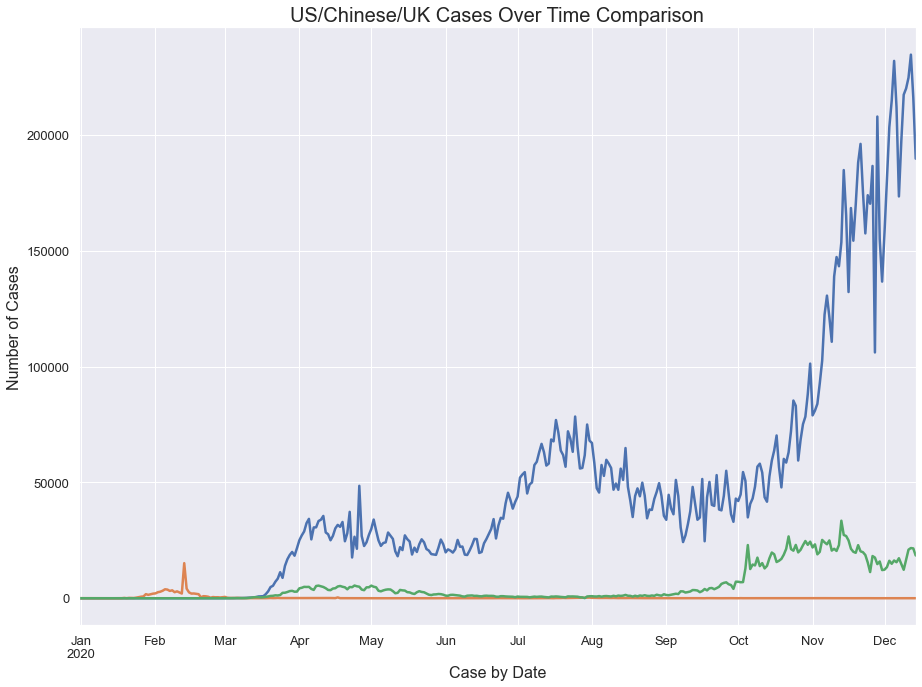

In [37]:
# Let's include china to use as a comparison point against the US.
Chinacovid19_df = covid19_df[covid19_df["countriesAndTerritories"] == "China"].reset_index()
China_daily = Chinacovid19_df.set_index('dateRep')

# Let's also include the UK as a comparison point
UKcovid19_df = covid19_df[covid19_df["countriesAndTerritories"] == "United_Kingdom"].reset_index()
UK_daily = UKcovid19_df.set_index('dateRep')

# US time series analysis 
UScovid19_df = covid19_df[covid19_df["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('dateRep')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cases'].plot(linewidth = 2.5)
China_daily['cases'].plot(linewidth = 2.5)
UK_daily['cases'].plot(linewidth = 2.5)


plt.title('US/Chinese/UK Cases Over Time Comparison', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### Like death rates in the entire population, we see large spikes in death counts over small periods of time. We also see similar spikes in April, July, and November/December. This is similar to the overall population as well.

### The UK mirrors the US pattern, but with smaller overall numbers. China shows some minor activity in February and a massive spike in April, followed by no activity. Again, this may be due to how China reported their cases.

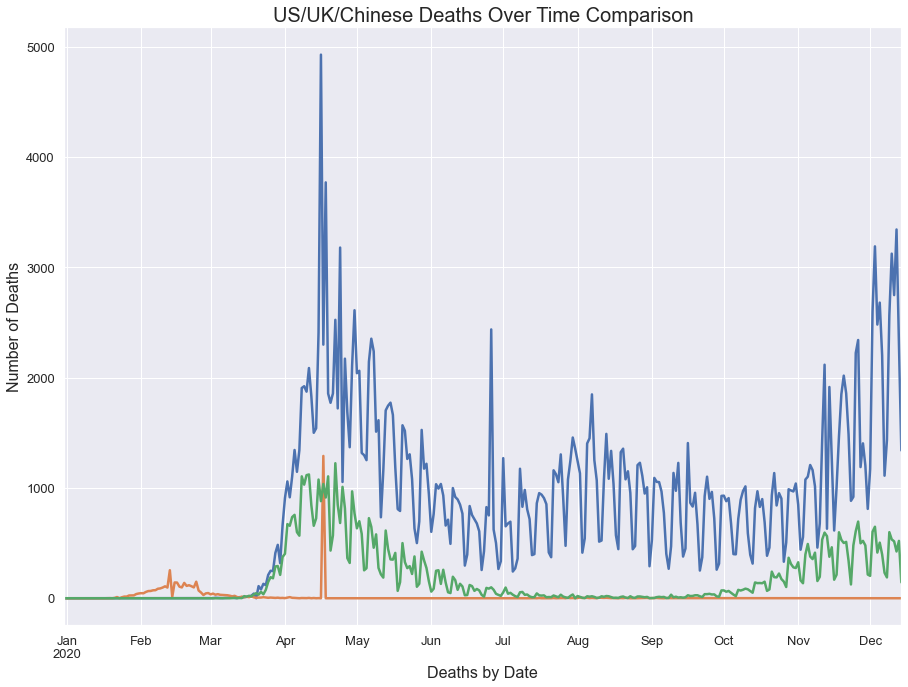

In [38]:
# Let's include china to use as a comparison point against the US.
Chinacovid19_df = covid19_df[covid19_df["countriesAndTerritories"] == "China"].reset_index()
China_daily = Chinacovid19_df.set_index('dateRep')

# Let's also include the UK as a comparison point
UKcovid19_df = covid19_df[covid19_df["countriesAndTerritories"] == "United_Kingdom"].reset_index()
UK_daily = UKcovid19_df.set_index('dateRep')

UScovid19_df = covid19_df[covid19_df["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('dateRep')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['deaths'].plot(linewidth = 2.5)
China_daily['deaths'].plot(linewidth = 2.5)
UK_daily['deaths'].plot(linewidth = 2.5)


plt.title('US/UK/Chinese Deaths Over Time Comparison', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### Not surpisingly, there is a strong positive correlation between cases and deaths. We also see a bit of correlation between the population and number of cases/deaths. 

<AxesSubplot:>

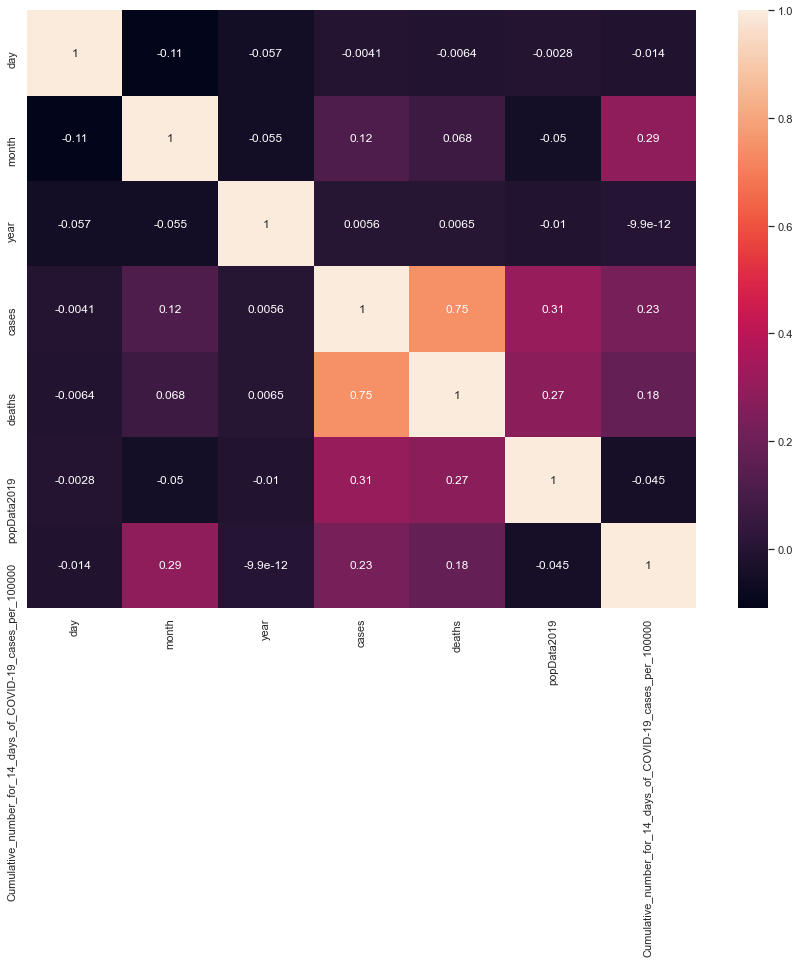

In [39]:
sns.heatmap(covid19_df.corr(),annot=True)

### Given the strong correlation between cases and deaths, lets run a quick KMeans clustering analysis between the two variables. Looking at the elbow curve, we will want to employ 3 clusters 

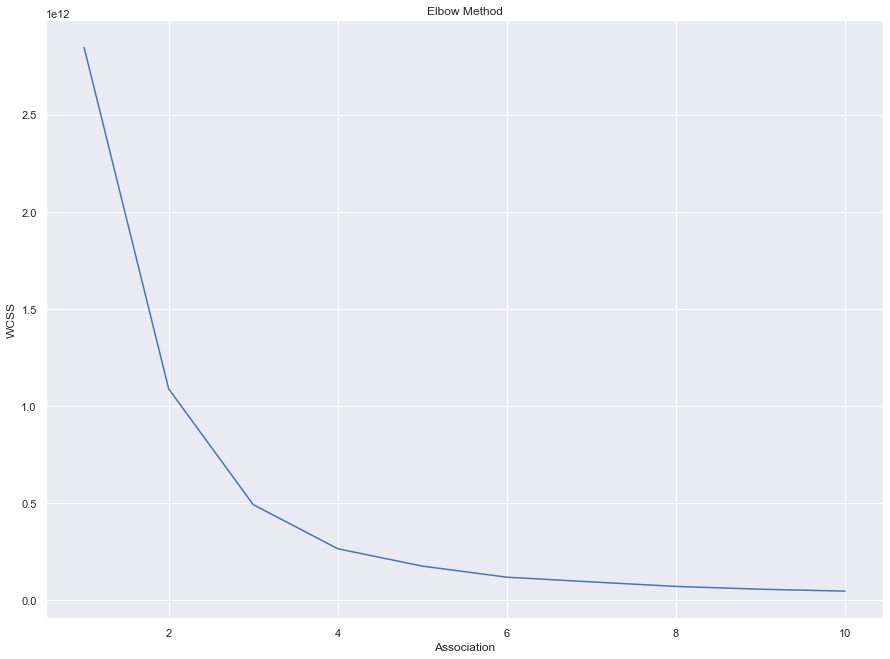

In [40]:
x = covid19_df.iloc[:, [4, 5]].values

#Let's select the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 400, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Association')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

### Looking at the three clusters, we can see that 2 of the clusters are tightly bunched near 0 and heavilty concentrated, while the third cluster is more scattered. Further analysis might involve checking if specific countries are associated with one of the three clusters.

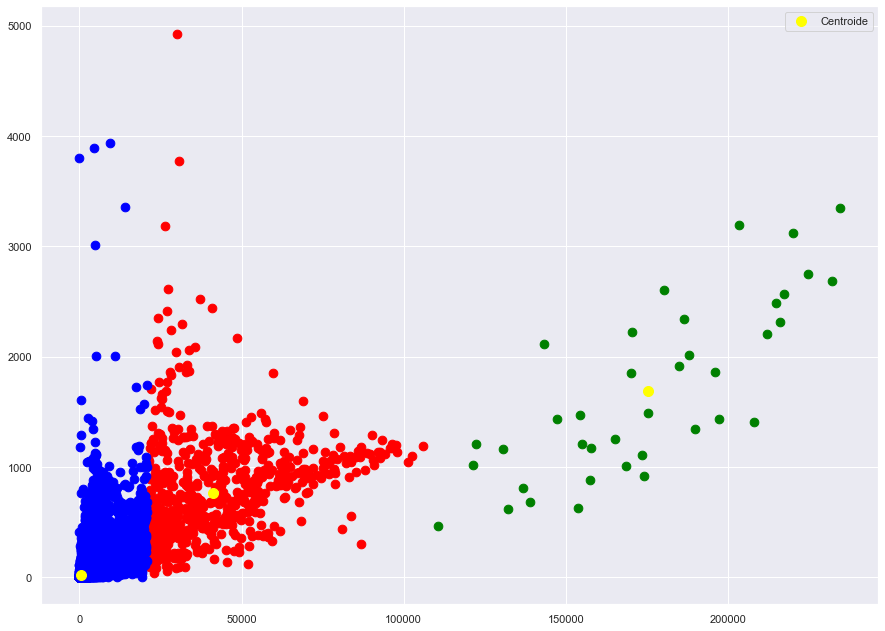

In [41]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, 
            c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, 
            c = 'blue')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, 
            c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:,1], s = 100, 
            c = 'yellow', label = 'Centroide')

plt.legend()

#### Data Analysis, Scaling & Comparisons






In [42]:
#creating a sub dataframe for only the US, also sorting by date to create new features cumulative Cases and cumulative Deaths
dfus=covid19_df[covid19_df["countriesAndTerritories"] == "United_States_of_America"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])
#creating new features cumCases and cumDeaths--update naming conventions to remain consistent 
dfus['usCumulativeCases'] = dfus['cases'].cumsum(axis = 0) 
dfus['usCumulativeDeaths'] = dfus['deaths'].cumsum(axis = 0) 

dfus[60:65]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usCumulativeCases,usCumulativeDeaths
60,2020-02-29,29,2,2020,6,0,United_States_of_America,US,USA,329064917.0,America,0.015498,66,0
61,2020-03-01,1,3,2020,3,1,United_States_of_America,US,USA,329064917.0,America,0.016410,69,1
62,2020-03-02,2,3,2020,20,1,United_States_of_America,US,USA,329064917.0,America,0.022488,89,2
63,2020-03-03,3,3,2020,14,4,United_States_of_America,US,USA,329064917.0,America,0.026742,103,6
64,2020-03-04,4,3,2020,22,3,United_States_of_America,US,USA,329064917.0,America,0.033428,125,9


### Let's adjust the cases per 100,000 to cases per Million, as it is a bit easier to comprehend.

### To provide more insight on the cumulative analysis, let's include a 'cumulativeFatality' metric that measures the cumulative fatality rates.

In [43]:
#create two new features casesPer100000 and fatalityRate
# NOTE: We should NOT be using hard coded population numbers. Instead, I replaced the US pop with the popData2019 variable
dfus['casesPerMil']=dfus['cases']/(dfus['popData2019']/100000000)

dfus['fatalityRate']=(dfus['deaths']/dfus['cases']).fillna(0)
# A small number of records will output inf values, which we will need to replace 
dfus['fatalityRate'] = dfus['fatalityRate'].replace(np.inf, 0)

dfus['cumulativeFatalityRate'] = dfus['fatalityRate'].cumsum(axis = 0) 
dfus.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,usCumulativeCases,usCumulativeDeaths,casesPerMil,fatalityRate,cumulativeFatalityRate
0,2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,66.320586,0,0,0.0,0.0,0.0
1,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,66.320586,0,0,0.0,0.0,0.0
2,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,66.320586,0,0,0.0,0.0,0.0
3,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,66.320586,0,0,0.0,0.0,0.0
4,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,66.320586,0,0,0.0,0.0,0.0


### US fatality rates show a huge spike in March and April, followed by a steadily declining trajectory 

Text(0, 0.5, 'fatalityRate')

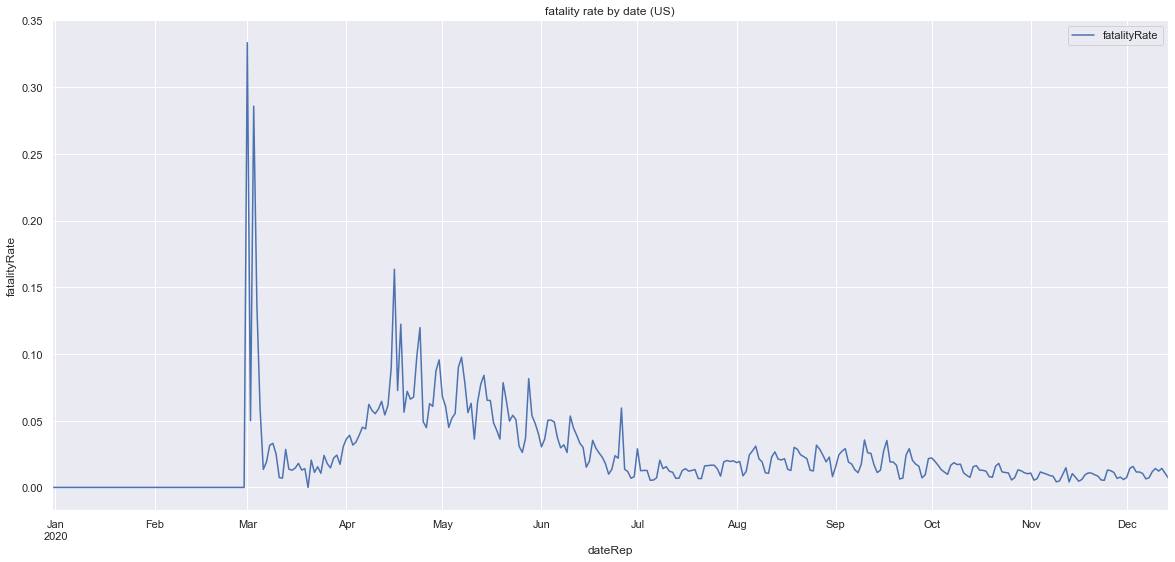

In [44]:
#taking a look of the fatality rate by date
ax = dfus.plot(x = 'dateRep', y ='fatalityRate', figsize=(20,9), title='fatality rate by date (US)')
ax.set_xlabel("dateRep")
ax.set_ylabel("fatalityRate")

### The key takeaway from the cumulative case total is the spike we see from November to December, which tracks with our previous analysis

Text(0, 0.5, 'cumCases')

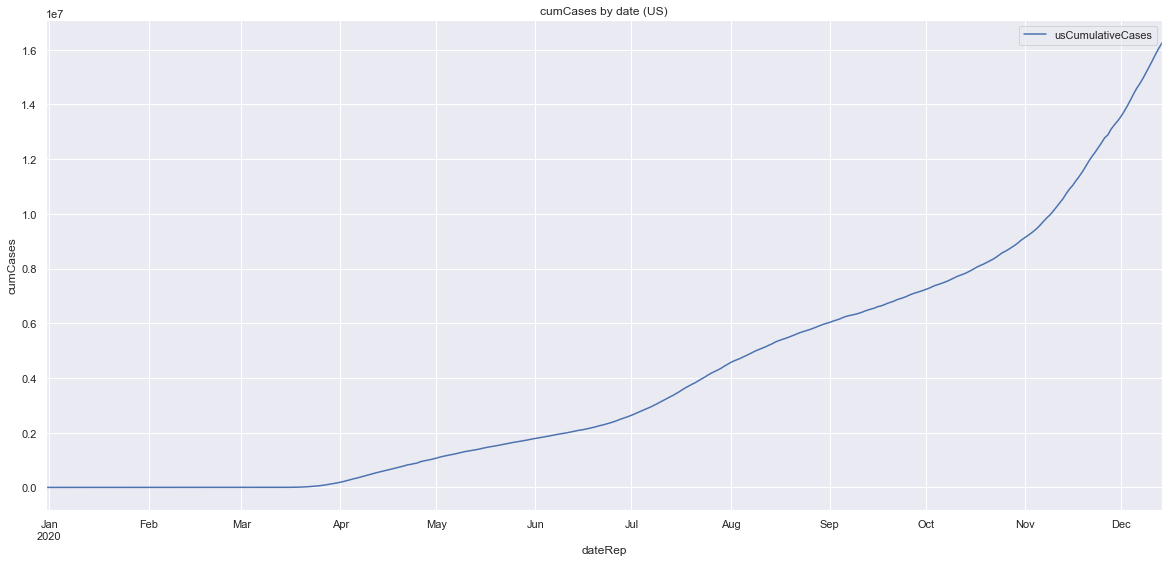

In [45]:
#taking a look of the cummulative cases number by date
ax2 = dfus.plot(x = 'dateRep', y ='usCumulativeCases', figsize=(20,9), title='cumCases by date (US)')
ax2.set_xlabel("dateRep")
ax2.set_ylabel("cumCases")

In [46]:
#Breaking down record numbers by country
bycoun = covid19_df.groupby(['countriesAndTerritories']).count().reset_index()
bycoun.head(10)

,countriesAndTerritories,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,Afghanistan,340,340,340,340,340,340,340,340,340,340,340
1,Albania,281,281,281,281,281,281,281,281,281,281,281
2,Algeria,345,345,345,345,345,345,345,345,345,345,345
3,Andorra,276,276,276,276,276,276,276,276,276,276,276
4,Angola,268,268,268,268,268,268,268,268,268,268,268
5,Anguilla,263,263,263,263,263,263,263,263,263,263,263
6,Antigua_and_Barbuda,270,270,270,270,270,270,270,270,270,270,270
7,Argentina,283,283,283,283,283,283,283,283,283,283,283
8,Armenia,341,341,341,341,341,341,341,341,341,341,341
9,Aruba,267,267,267,267,267,267,267,267,267,267,267


In [47]:
#first lets compare some countries without scaling, let's find countries with the same records as the US
bycoun.loc[bycoun['countriesAndTerritories'] == 'United_States_of_America']

,countriesAndTerritories,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
202,United_States_of_America,350,350,350,350,350,350,350,350,350,350,350


In [48]:
# let's pick Belgium to compare with the US
dfbe=covid19_df[covid19_df["countriesAndTerritories"] == "Belgium"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])
#creating new features cumCases
dfbe['belgiumCumulativeCases'] = dfbe['cases'].cumsum(axis = 0) 
dfbe[60:65]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,belgiumCumulativeCases
60,2020-02-29,29,2,2020,0,0,Belgium,BE,BEL,11455519.0,Europe,0.000000,1
61,2020-03-01,1,3,2020,18,0,Belgium,BE,BEL,11455519.0,Europe,0.000000,19
62,2020-03-02,2,3,2020,0,0,Belgium,BE,BEL,11455519.0,Europe,0.157130,19
63,2020-03-03,3,3,2020,19,0,Belgium,BE,BEL,11455519.0,Europe,0.157130,38
64,2020-03-04,4,3,2020,34,0,Belgium,BE,BEL,11455519.0,Europe,0.322988,72


### We will add China and the UK back in as well to compare with the previous visualizations

In [49]:
# United Kingdom
dfuk=covid19_df[covid19_df["countriesAndTerritories"] == "United_Kingdom"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])
dfuk['UKCumulativeCases'] = dfuk['cases'].cumsum(axis = 0) 

# China
dfch=covid19_df[covid19_df["countriesAndTerritories"] == "China"].copy().sort_values(by='dateRep').reset_index().drop(columns=['index'])
dfch['ChinaCumulativeCases'] = dfch['cases'].cumsum(axis = 0) 

### Update Plot title to show all countries involved in comparison

<AxesSubplot:title={'center':'cumulativeCases by date (US, Belgium, UK, China)'}, xlabel='dateRep'>

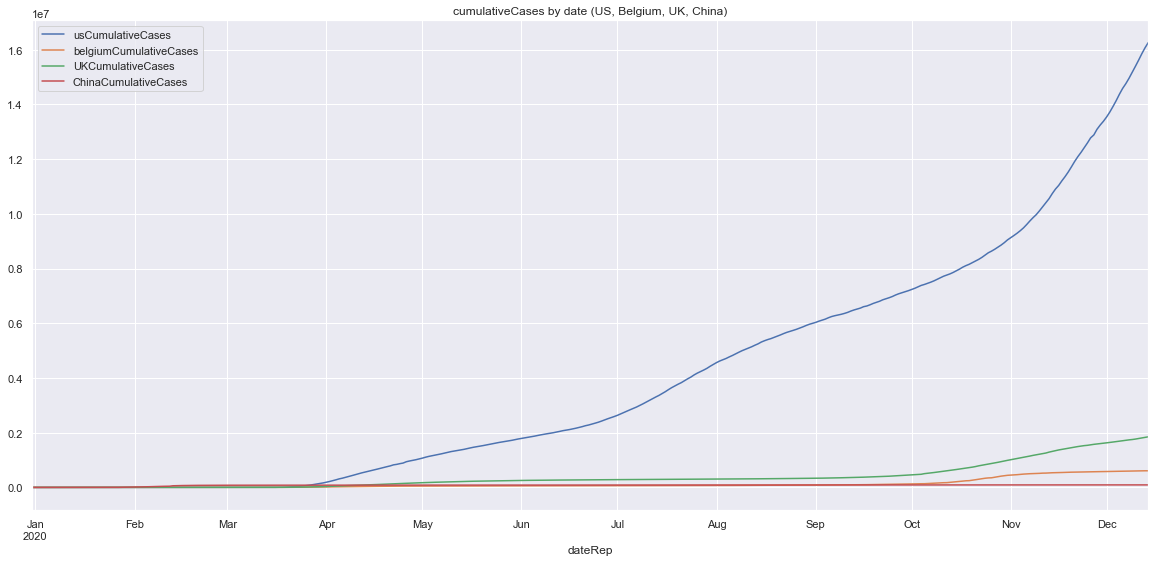

In [50]:
# Plotting them together to compare
ax2 = dfus.plot(x = 'dateRep', y ='usCumulativeCases', figsize=(20,9), title='cumulativeCases by date (US, Belgium, UK, China)')
dfbe.plot(x = 'dateRep', y ='belgiumCumulativeCases', figsize=(20,9), ax=ax2)
dfuk.plot(x = 'dateRep', y ='UKCumulativeCases', figsize=(20,9), ax=ax2)
dfch.plot(x = 'dateRep', y ='ChinaCumulativeCases', figsize=(20,9), ax=ax2)

In [51]:
# We cannot compare these two in the same graph because the population difference is huge
# Choosing cumulative cases as the variable to scale
W = dfus['usCumulativeCases'].values.reshape(-1, 1)
X = dfbe['belgiumCumulativeCases'].values.reshape(-1, 1)
Y = dfuk['UKCumulativeCases'].values.reshape(-1, 1)
Z = dfch['ChinaCumulativeCases'].values.reshape(-1, 1)

In [52]:
#adding to addition columns Stan and Minm, they are the cumulative cases after standard scaling and min max scaling, respectively
dfus['usStandard'] = StandardScaler().fit_transform(W)
dfus['usMinmax'] = MinMaxScaler().fit_transform(W)
dfbe['belgiumStandard'] = StandardScaler().fit_transform(X)
dfbe['belgiumMinmax'] = MinMaxScaler().fit_transform(X)
dfuk['UKStandard'] = StandardScaler().fit_transform(Y)
dfuk['UKMinmax'] = MinMaxScaler().fit_transform(Y)
dfch['ChinaStandard'] = StandardScaler().fit_transform(Z)
dfch['ChinaMinmax'] = MinMaxScaler().fit_transform(Z)

# Thoughts on adding other countries to this analysis ?
# The UK and China have been added for additional comparison points 


# OTHER SCALING METHODS  
#dfus['Maxa'] = MaxAbsScaler().fit_transform(X)
#dfus['Robu'] = RobustScaler(quantile_range=(25, 75)).fit_transform(X)
#dfus['Yeoj'] = PowerTransformer(method='yeo-johnson').fit_transform(X)
#dfus['QUnif'] = QuantileTransformer(output_distribution='uniform').fit_transform(X)
#dfus['QNorm'] = QuantileTransformer(output_distribution='normal').fit_transform(X)
#dfus['Norm'] = Normalizer().fit_transform(X)

### Looking at the outputs of Standard Scaling and Min_Max scaling together, I would recomend using min_max scaling in this instance. Having the 0-1 scale via min_max allows you to see how each individual countries case rates grew through the timeframe and compare it against other countries on the same scale. The standard scaling may be a little misleading in this instance, as it shows the UK as having a slightly higher cumulative case rate than the US despite having significantly fewer actaul cases

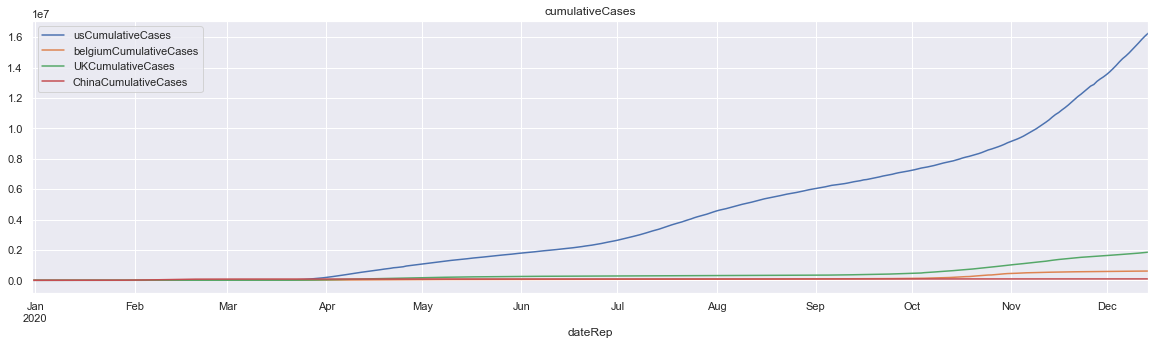

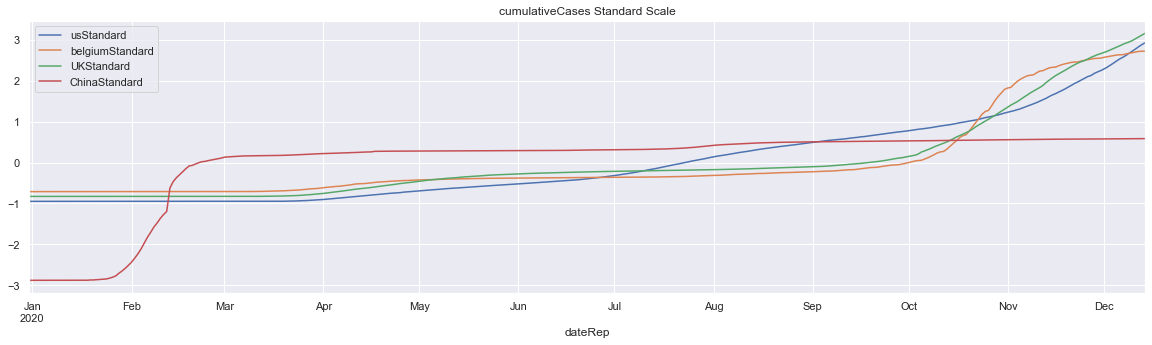

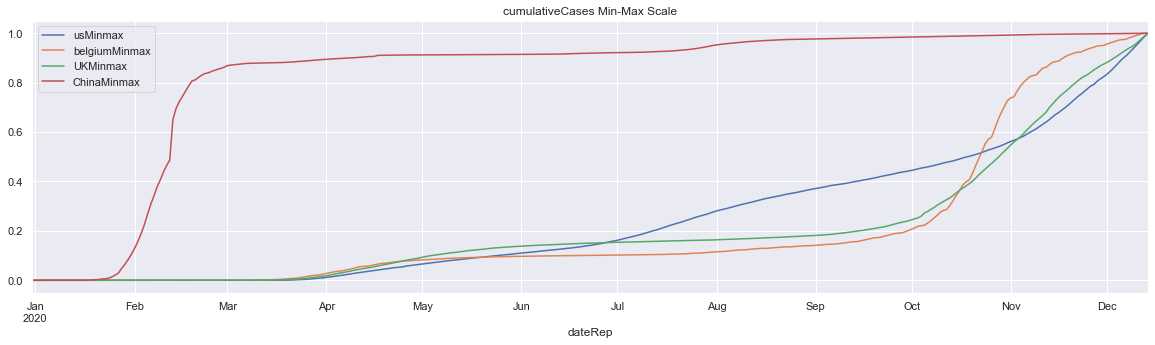

In [53]:
#Plotting the 3 scales against each other
sns.set(rc={'figure.figsize':(20, 5)})
ax5 = dfus.plot(x='dateRep', y='usCumulativeCases', title='cumulativeCases');
dfbe.plot(x='dateRep', y='belgiumCumulativeCases', title='cumulativeCases', ax=ax5);
dfuk.plot(x='dateRep', y='UKCumulativeCases', title='cumulativeCases', ax=ax5);
dfch.plot(x='dateRep', y='ChinaCumulativeCases', title='cumulativeCases', ax=ax5);

ax6 = dfus.plot(x='dateRep', y='usStandard', title='cumulativeCases Standard Scale');
dfbe.plot(x='dateRep', y='belgiumStandard', title='cumulativeCases Standard Scale', ax=ax6);
dfuk.plot(x='dateRep', y='UKStandard', title='cumulativeCases Standard Scale', ax=ax6);
dfch.plot(x='dateRep', y='ChinaStandard', title='cumulativeCases Standard Scale', ax=ax6);

ax7 = dfus.plot(x='dateRep', y='usMinmax', title='cumulativeCases Min-Max Scale');
dfbe.plot(x='dateRep', y='belgiumMinmax', title='cumulativeCases Min-Max Scale', ax=ax7);
dfuk.plot(x='dateRep', y='UKMinmax', title='cumulativeCases Min-Max Scale', ax=ax7);
dfch.plot(x='dateRep', y='ChinaMinmax', title='cumulativeCases Min-Max Scale', ax=ax7);

### While I can run FB Prophet in Google Colab, I am unable to run it within Jupyter notebook and will thus comment out this section.

### Prophet is a time-series forecasting tool that uses an "additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects". However, Prophet is most useful "with time series that have strong seasonal effects and several seasons of historical data". Because we only have one year of data and this (hopefully) is not something that will re-occur annualy, it may not be as useful in this application.

### The answer to the additional points section has also been answered.

Source: https://medium.com/analytics-vidhya/time-series-analysis-a-quick-tour-of-fbprophet-cbbfbffdf9d8#:~:text=FbProphet%20is%20a%20powerful%20time,analytics%20and%20forecasting%20at%20scale.

In [54]:
# # Can I try something else here maybe a using forecasting libary
# # setting up df for fb prophet
# fbdf = pd.DataFrame(dfus.sort_values(by='dateRep').reset_index(), columns = ['dateRep', 'usCumulativeCases'])
# fbdf = fbdf.rename(columns={"dateRep": "ds", "usCumulativeCases": "y"})
# fbdf.head()

# # ADDITIONAL POINTS : Why is it all NaN ? What would be an alternate solution/finding/recommendation ?
# ANSWER: CumulativeCases needs to be updated to usCumulativeCases, which is the correct name for the column

In [55]:
# # Will need some tweaking here
# ml = Prophet(daily_seasonality=True,yearly_seasonality=True)
# ml.fit(fbdf)
# future = ml.make_future_dataframe(periods=365)
# forecast = ml.predict(future)
# plot1 = ml.plot(forecast)

FINDINGS/ANALYSIS:



Questions

*   What are the management and analytical questions associated with this problem?
*   What are some of the assumptions if any ?
*   What are your findings/recommendations (if any) based on your analysis of the dataset?




### What are the management and analytical questions associated with this problem?

One priamry management and analytical question associated with this problem is looking at how COVID impacted different countries throughout the duration of the year. Looking at case rates and death rates broken out by country can provide insight into how COVID impacted different countries. It also can provide insight into how different countries reacted to the virus. We may want to locate countries with quick decreases in cases and deaths after an initail spike and conduct further research into how they were able to effectively manage COVID. This problem allows us to look at what months were particularly difficult and how cases and deaths are correlated with each other. This data could also be used as a forecasting tool to try and predict how cases/deaths may fluctuate moving forward.

### What are some of the assumptions if any ?

When cleaning the data, there were several days with negative case and death totals. I made the assumption that you cannot have negative case and death numbers, and therefore removed these instances from the dataframe. One assumption I had coming into the assigment was that data provided by each country was accurate. However, when analyzing some of the data, I am not sure that is a safe assumption. Therefore I would caveat the findings by indicating that this is data provided by individual countries.

### What are your findings/recommendations (if any) based on your analysis of the dataset?

My primary recommendation would be that you need to scale the data prior to doing some form of comparison analysis between countries. The differences in populations make raw count comparisons ineffective. I would also generally recommend using rates as opposed to counts in order to avoid issues like we saw with the population differences. As noted above, if running a prediction model, I would look at how using a log transformation on features with a heavily skewed distribution might alter performance. I would also recommend seeing how the different scaling techinques (standard, min_max, etc.) impact model performance to determine the optimal route. After scaling and preprocessing, I would make the recommendation to identify countries with  the lowest case/death rates to identify commonalities on how they combatted the virus. You could then do the same for countries with high case/death rates. This may provide insight on do's and dont's for managing viruses in the future. You could always develop a time series forecast to attempt to predict how the virus might behave moving forward. I have included findings on specific plots in the comments above as well.